# mathwriting

In [ ]:
from datasets import load_from_disk

# Load the dataset from the local directory
dataset = load_from_disk("./MathWriting-human")

# Print dataset info
print(dataset)

# Example: Access the first sample
print(dataset["train"][0])  # Adjust split name ("train", "test", etc.) based on dataset structure

In [9]:
!python --version

Python 3.9.23


In [10]:
import os
print(os.getcwd())

/home/rc/version-sdk/sandbox


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_parquet("mathwriting/data/test-00000-of-00001-694f317d8b634199.parquet")
df.head()

,image,latex,sample_id,split_tag,data_type
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,\overline{X}+X_{\xi},7fa5c261545ac47c,test,human
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,\frac{q}{A}=h_{o}(T_{o}-T_{s}),90320c048bb19cfb,test,human
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"\langle a_{0},a_{1},...\rangle\in R^{\omega}",728855ac96fa6bee,test,human
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,R=\sqrt[3]{\frac{6N}{\pi}},e111b0d7d6b879b6,test,human
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,\forall i[|R_{i}|=K],d0ee25a7743a34ad,test,human


In [12]:
df.shape

(7644, 5)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7644 entries, 0 to 7643
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      7644 non-null   object
 1   latex      7644 non-null   object
 2   sample_id  7644 non-null   object
 3   split_tag  7644 non-null   object
 4   data_type  7644 non-null   object
dtypes: object(5)
memory usage: 298.7+ KB


In [14]:
df = pd.read_parquet("mathwriting/data/train-00000-of-00003-ab0ae6b9fa4a3f06.parquet")
df.head()

,image,latex,sample_id,split_tag,data_type
0,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,V(\tilde{\beta}),47f7bccab32dc3b3,train,human
1,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,GL(V)\times S_{n},1fe782f3cfdb576c,train,human
2,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,\tilde{f}:X\rightarrow M_{f},3e223198b4dd0d3e,train,human
3,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,"\{g_{1},g_{2},g_{3}\}",df7b0ba66278feaa,train,human
4,{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...,\frac{418^{163}}{(197^{4}\cdot10)},1f8c6fc99965fda9,train,human


In [15]:
df.shape

(76622, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76622 entries, 0 to 76621
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   image      76622 non-null  object
 1   latex      76622 non-null  object
 2   sample_id  76622 non-null  object
 3   split_tag  76622 non-null  object
 4   data_type  76622 non-null  object
dtypes: object(5)
memory usage: 2.9+ MB


In [ ]:
from ydata_profiling import ProfileReport

# Overview of data
profile = ProfileReport(df, title="mathwriting")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
from datasets import load_dataset
dataset = load_dataset("deepcopy/MathWriting-human", streaming=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Parquet files
try:
    df = pd.read_parquet(dataset)
except FileNotFoundError:
    print("Error: Parquet file not found. Please provide the correct path.")
    exit()

# Display the first few rows and information
print("Head of the DataFrame:")
print(df.head())
print("\nDataFrame Info:")
df.info()

# Analyze missing values
print("\nMissing Values:")
print(df.isnull().sum())


if 'confidence_score' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='confidence_score', kde=True)
    plt.title('Distribution of OCR Confidence Scores')
    plt.xlabel('Confidence Score')
    plt.ylabel('Frequency')
    plt.show()


if 'extracted_text' in df.columns:
    # Analyze text length distribution
    df['text_length'] = df['extracted_text'].str.len()
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x='text_length', kde=True)
    plt.title('Distribution of Extracted Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [19]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import OpenEXR
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import io

# Load the dataset
print(dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 3
    })
    test: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 1
    })
    val: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 1
    })
})


In [20]:
# !pixi search opencv-python*

In [21]:
!pixi add opencv-python --pypi

⠁ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2                                                                             
⠁ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠁ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠙ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2                                                                             
⠚ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠚ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠚ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠚ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠚ updating lock-file   [00:00:00] [────────────────────────────────────────]    0/2    
⠚ updating lock-file   [00:00:00] [───────────────────────────

In [22]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image

# Load the dataset in streaming mode
dataset = load_dataset("deepcopy/MathWriting-human", streaming=True)
print(dataset)

IterableDatasetDict({
    train: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 3
    })
    test: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 1
    })
    val: IterableDataset({
        features: ['image', 'latex', 'sample_id', 'split_tag', 'data_type'],
        num_shards: 1
    })
})


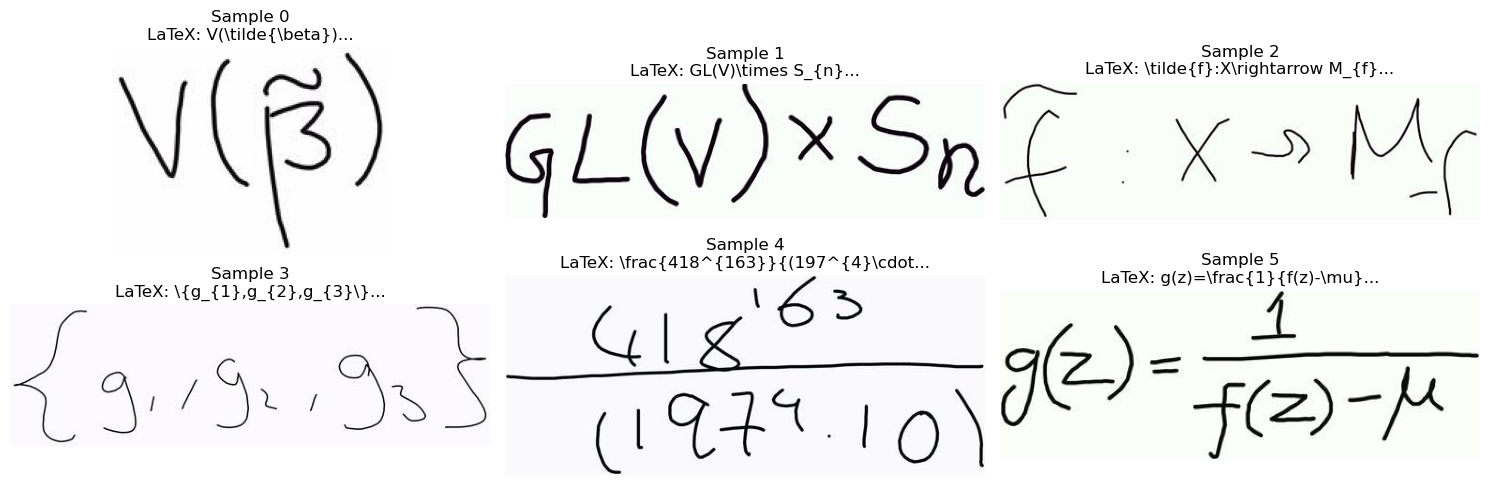

In [23]:
def plot_images(dataset, split="train", num_samples=6):
    plt.figure(figsize=(15, 5))
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        image = sample["image"]  # Pillow Image
        image = np.array(image)  # Convert to NumPy array
        if len(image.shape) == 2:  # Grayscale to RGB
            image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        
        plt.subplot(2, 3, count + 1)
        plt.imshow(image)
        plt.title(f"Sample {count}\nLaTeX: {sample['latex'][:30]}...")
        plt.axis("off")
        count += 1
    plt.tight_layout()
    plt.show()

# Plot sample images
plot_images(dataset, split="train")

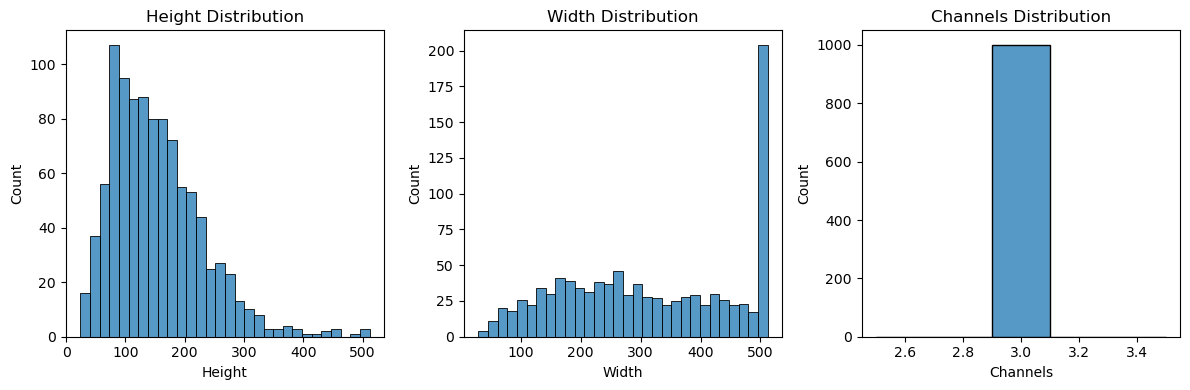

            Height        Width  Channels
count  1000.000000  1000.000000    1000.0
mean    153.143000   316.632000       3.0
std      76.653691   144.695713       0.0
min      24.000000    29.000000       3.0
25%      95.000000   191.000000       3.0
50%     140.000000   306.000000       3.0
75%     197.000000   461.000000       3.0
max     512.000000   512.000000       3.0


In [24]:
def analyze_image_properties(dataset, split="train", num_samples=1000):
    heights, widths, channels = [], [], []
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        image = np.array(sample["image"])
        h, w = image.shape[:2]
        c = image.shape[2] if len(image.shape) == 3 else 1
        heights.append(h)
        widths.append(w)
        channels.append(c)
        count += 1
    
    # Create a DataFrame
    df = pd.DataFrame({"Height": heights, "Width": widths, "Channels": channels})
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    sns.histplot(df["Height"], bins=30)
    plt.title("Height Distribution")
    plt.subplot(1, 3, 2)
    sns.histplot(df["Width"], bins=30)
    plt.title("Width Distribution")
    plt.subplot(1, 3, 3)
    sns.histplot(df["Channels"], bins=5)
    plt.title("Channels Distribution")
    plt.tight_layout()
    plt.show()
    
    print(df.describe())


analyze_image_properties(dataset, split="train")

Number of unique LaTeX strings: 962
Top 5 most frequent LaTeX strings:
latex
7^{7^{\cdot^{\cdot^{\cdot^{u}}}}}            3
\sqrt{390}^{\sqrt{7}}+\frac{6}{\sqrt{10}}    3
V(\tilde{\beta})                             2
\int_{0}^{1}n(x)dx                           2
(\begin{matrix}0&0\\ 0&1\end{matrix})        2
Name: count, dtype: int64


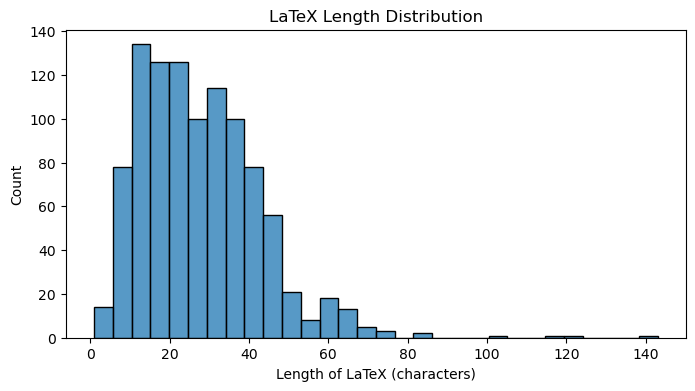

In [25]:
def analyze_latex(dataset, split="train", num_samples=1000):
    latex_strings = []
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        latex_strings.append(sample["latex"])
        count += 1
    
    # Analyze
    df_latex = pd.DataFrame({"latex": latex_strings})
    df_latex["length"] = df_latex["latex"].apply(len)
    
    print(f"Number of unique LaTeX strings: {df_latex['latex'].nunique()}")
    print("Top 5 most frequent LaTeX strings:")
    print(df_latex["latex"].value_counts().head())
    
    # Plot length distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df_latex["length"], bins=30)
    plt.title("LaTeX Length Distribution")
    plt.xlabel("Length of LaTeX (characters)")
    plt.show()

# Analyze LaTeX
analyze_latex(dataset, split="train")

In [26]:
def check_data_quality(dataset, split="train", num_samples=1000):
    missing_images = 0
    corrupted_images = 0
    missing_latex = 0
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        try:
            image = np.array(sample["image"])
            if image.size == 0:
                corrupted_images += 1
        except:
            corrupted_images += 1
        if not sample["latex"] or sample["latex"].strip() == "":
            missing_latex += 1
        count += 1
    
    print(f"Missing or corrupted images: {corrupted_images}")
    print(f"Missing LaTeX annotations: {missing_latex}")

# Check data quality
check_data_quality(dataset, split="train")

Missing or corrupted images: 0
Missing LaTeX annotations: 0


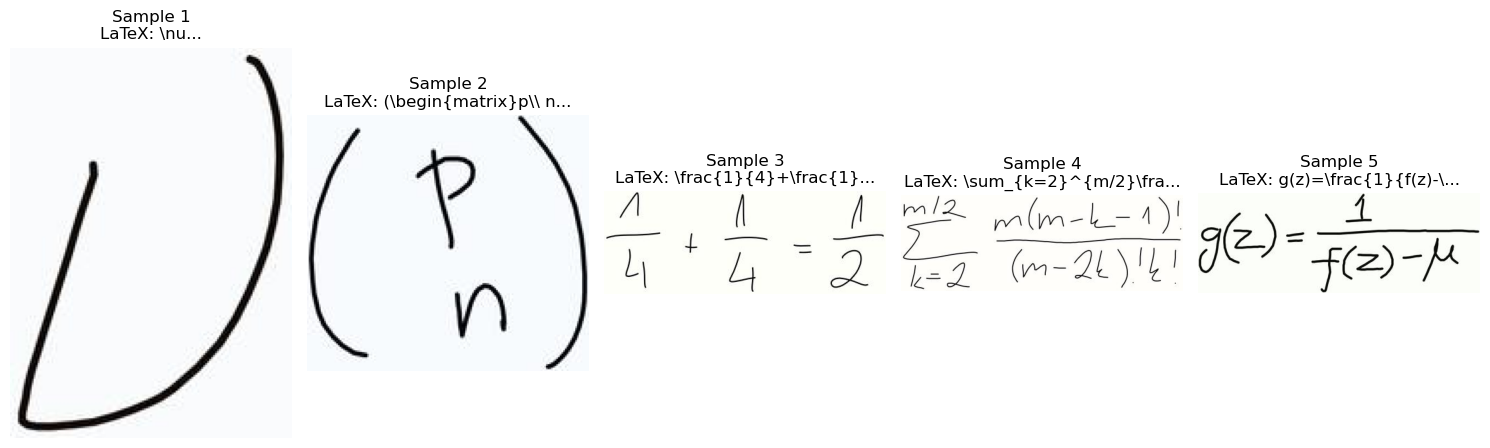

In [27]:
from datasets import load_dataset
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

# Load the dataset in streaming mode
dataset = load_dataset("deepcopy/MathWriting-human", streaming=True)

# Collect a subset of samples (e.g., 100) to sample from
def collect_subset(dataset, split="train", max_samples=100):
    subset = []
    count = 0
    for sample in dataset[split]:
        subset.append(sample)
        count += 1
        if count >= max_samples:
            break
    return subset

# Get a subset and randomly select 5 samples
subset = collect_subset(dataset, split="train", max_samples=100)
random_samples = random.sample(subset, k=5)

# Plot the 5 random samples
plt.figure(figsize=(15, 5))
for i, sample in enumerate(random_samples):
    image = sample["image"]  # Pillow Image
    image = np.array(image)  # Convert to NumPy array
    if len(image.shape) == 2:  # Grayscale to RGB
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title(f"Sample {i+1}\nLaTeX: {sample['latex'][:20]}...")
    plt.axis("off")
plt.tight_layout()
plt.show()

Top 10 most frequent symbols/tokens:
[('{', 3020), ('}', 3020), ('_', 685), ('^', 645), ('\\frac', 550), ('1', 544), ('x', 483), (')', 461), ('(', 459), ('=', 456)]


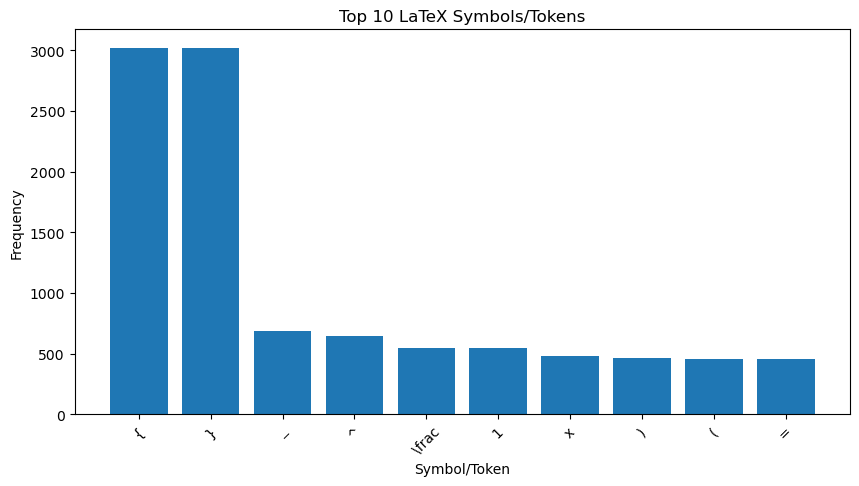

In [28]:
from collections import Counter
import re

def analyze_symbol_frequency(dataset, split="train", num_samples=1000):
    symbols = []
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        latex = sample["latex"]
        # Extract common math symbols (simplified)
        tokens = re.findall(r'\\[a-zA-Z]+|[a-zA-Z0-9]|\^|\_|\{|\}|\+|\-|\*|/|=|\(|\)|\[|\]', latex)
        symbols.extend(tokens)
        count += 1
    
    # Count symbol frequency
    symbol_counts = Counter(symbols)
    print("Top 10 most frequent symbols/tokens:")
    print(symbol_counts.most_common(10))
    
    # Plot
    plt.figure(figsize=(10, 5))
    top_symbols = dict(symbol_counts.most_common(10))
    plt.bar(top_symbols.keys(), top_symbols.values())
    plt.title("Top 10 LaTeX Symbols/Tokens")
    plt.xlabel("Symbol/Token")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

# Analyze symbol frequency
analyze_symbol_frequency(dataset)

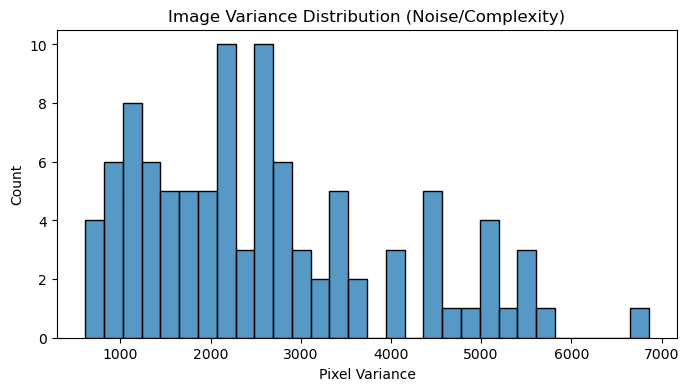

In [29]:
def analyze_image_noise(dataset, split="train", num_samples=100):
    variances = []
    count = 0
    for sample in dataset[split]:
        if count >= num_samples:
            break
        image = np.array(sample["image"])
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        variance = np.var(image)
        variances.append(variance)
        count += 1
    
    plt.figure(figsize=(8, 4))
    sns.histplot(variances, bins=30)
    plt.title("Image Variance Distribution (Noise/Complexity)")
    plt.xlabel("Pixel Variance")
    plt.show()

# Analyze image noise
analyze_image_noise(dataset)

In [30]:
def estimate_dataset_size(dataset, split="train", max_samples=1000000000):
    count = 0
    for _ in dataset[split]:
        count += 1
        if count >= max_samples:
            break
    print(f"Estimated size of {split} split: {count}+ samples (stopped at {max_samples})")

# Estimate size
estimate_dataset_size(dataset)

Estimated size of train split: 229864+ samples (stopped at 1000000000)


In [ ]:
# need to pull toolchain and build version toolchain. feasible. can plug in deepmind math dataset to build for better reasoning. is doable.